<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/CustomAnimalDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


we unzip the zip file locally 

In [0]:
import os
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/CATS_DOGS.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("CATS_DOGS/train/CAT/1.jpg")

We use the Keras ImageGenerator to make an Data Augementation to reuse the same data in number of different ways 

In [5]:
from keras.preprocessing.image import ImageDataGenerator

imageGenerator = ImageDataGenerator(rotation_range=40,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.4,zoom_range=0.3,horizontal_flip=True,rescale=1/255)

Using TensorFlow backend.


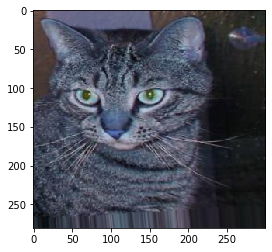

In [6]:
test = imageGenerator.random_transform(image)
plt.imshow(test)

now we will apply this image generator to train datasets 

In [7]:
train_gen=imageGenerator.flow_from_directory("CATS_DOGS/train/",target_size=(100,100),class_mode='binary',batch_size=16)
test_gen=imageGenerator.flow_from_directory("CATS_DOGS/test/",target_size=(100,100),class_mode='binary',batch_size=16)

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(4,4),activation='relu'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 97, 97, 128)       6272      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 128)       262272    
_________________________________________________________________
flatten_2 (Flatten)          (None, 259200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               132710912 
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.fit_generator(train_gen,epochs=100,verbose=1,validation_data=test_gen,validation_steps=64,steps_per_epoch=150)

Epoch 1/100
 26/150 [====>.........................] - ETA: 25s - loss: 7.8923 - acc: 0.4856

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

150/150 [==============================] - 22s 144ms/step - loss: 7.7884 - acc: 0.5125 - val_loss: 8.1377 - val_acc: 0.4951
Epoch 2/100
150/150 [==============================] - 18s 123ms/step - loss: 8.4083 - acc: 0.4783 - val_loss: 8.5155 - val_acc: 0.4717
Epoch 3/100
150/150 [==============================] - 19s 123ms/step - loss: 8.1329 - acc: 0.4954 - val_loss: 7.8859 - val_acc: 0.5107
Epoch 4/100
150/150 [==============================] - 18s 122ms/step - loss: 8.0313 - acc: 0.5017 - val_loss: 7.7757 - val_acc: 0.5176
Epoch 5/100
150/150 [==============================] - 19s 127ms/step - loss: 8.0255 - acc: 0.5021 - val_loss: 7.8387 - val_acc: 0.5137
Epoch 6/100
150/150 [==============================] - 20s 137ms/step - loss: 7.9852 - acc: 0.5046 - val_loss: 8.3109 - val_acc: 0.4844
Epoch 7/100
150/150 [==============================] - 19s 124ms/step - loss: 7.9785 - acc: 0.5050 - val_loss: 7.6241 - val_acc: 0.5270
Epoch 8/100
150/150 [==============================] - 19s 1

In [14]:
nb_samples = len(test_gen)
predict = model.predict_generator(test_gen,steps=nb_samples,verbose=1)
from sklearn.metrics import classification_report

391/391 [==============================] - 35s 89ms/step


array([[0.41361123],
       [0.26688868],
       [0.77493703],
       ...,
       [0.6572542 ],
       [0.5036863 ],
       [0.37134677]], dtype=float32)